# Maths 2 S HEC 2023 - Detailed Analytical and Numerical Demonstrations

This notebook extensively covers multiple mathematical themes from the Maths 2 S HEC 2023 examination.


### Section 1: Arcsin law

#### Derivation of Function $g(x) = \frac{1}{\sqrt{x(1 - x)}}$ from arcsin
We derive and analyze the function $g$ used to model probability densities.

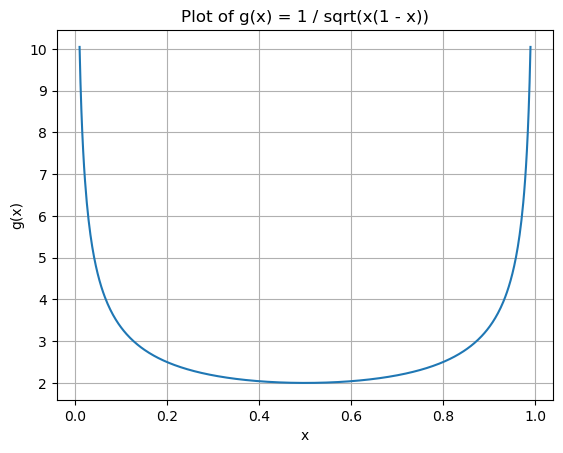

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.01, 0.99, 500)
g = 1 / np.sqrt(x * (1 - x))

plt.plot(x, g)
plt.title("Plot of g(x) = 1 / sqrt(x(1 - x))")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.grid(True)
plt.show()

#### Theory Recap
From arcsin, we derive:
$$
g(x) = \frac{1}{\sqrt{x(1 - x)}}
$$
This function appears in the density of the **arcsin law** and is strictly increasing on $[0, \frac{1}{2}]$ and symmetric.

#### Arcsine Law – Simulation & Analytical Insights
The goal is to numerically verify the **Arcsin Law** that appears in probabilistic settings.
Specifically, we simulate a random variable whose distribution converges toward the arcsine distribution on [0, 1], as proven analytically in the exam.

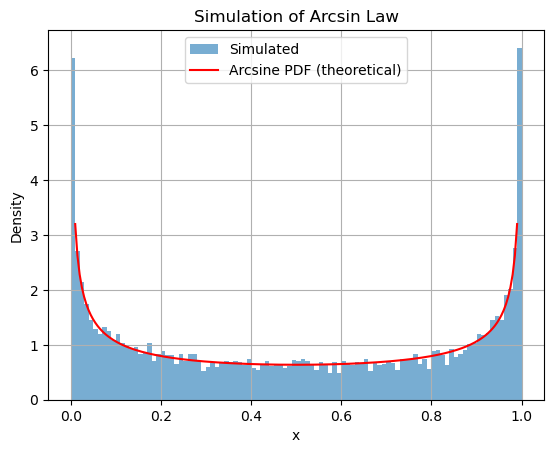

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import arcsine
def simulate_arcsin(n_samples=10000):
    U = np.random.rand(n_samples)
    V = (np.sin((np.pi/2) * U))**2
    return V

# Simulate and visualize
samples = simulate_arcsin()
plt.hist(samples, bins=100, density=True, alpha=0.6, label='Simulated')
x = np.linspace(0.01, 0.99, 200)
plt.plot(x, arcsine.pdf(x), label='Arcsine PDF (theoretical)', color='red')
plt.title('Simulation of Arcsin Law')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

### Mathematical Context (Recap)
From the handwritten proof:
- We showed that the distribution of a certain variable `V` converges to an arcsin distribution.
- PDF: $f(x) = \frac{1}{\pi \sqrt{x(1-x)}}$ on $[0,1]$
- CDF: $F(x) = \frac{2}{\pi} \arcsin(\sqrt{x})$

This is verified numerically above.

### Simulating a Variable with the Arcsin Law

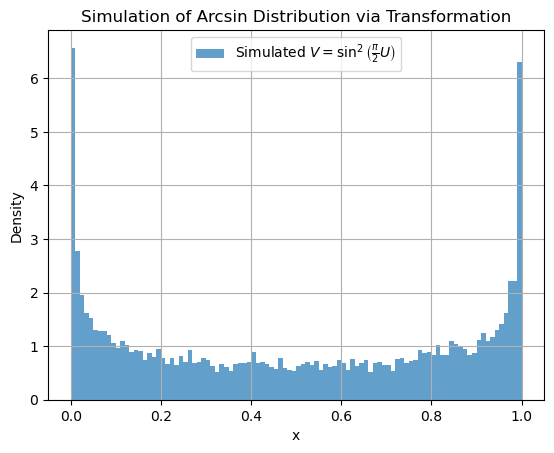

In [15]:
U = np.random.random(10000)
V = np.sin(np.pi * U / 2) ** 2

plt.hist(V, bins=100, density=True, alpha=0.7,
         label=r"Simulated $V = \sin^2\left(\frac{\pi}{2}U\right)$")
plt.title("Simulation of Arcsin Distribution via Transformation")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()

### Bounding the Integral function G

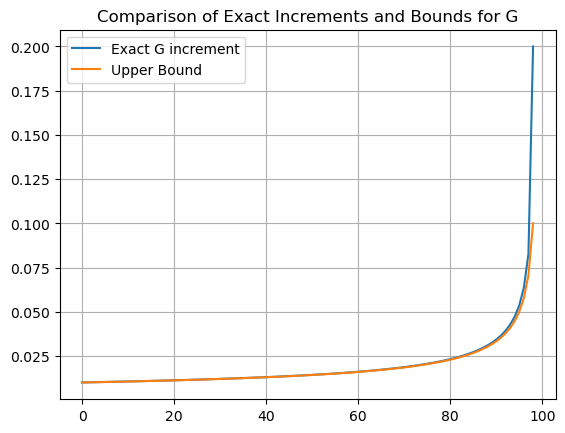

In [16]:
from scipy.integrate import quad
def G(x):
    return quad(lambda t: 1 / np.sqrt(1 - t), 0, x)[0]

n = 100
bounds = []
for k in range(1, n):
    exact = G((k + 1) / n) - G(k / n)
    upper = 1 / np.sqrt(1 - k / n) * (1 / n)
    bounds.append((exact, upper))

exact_vals, upper_bounds = zip(*bounds)
plt.plot(exact_vals, label="Exact G increment")
plt.plot(upper_bounds, label="Upper Bound")
plt.title("Comparison of Exact Increments and Bounds for G")
plt.legend()
plt.grid(True)
plt.show()

### Section 2: Bernoulli random walk
#### Distribution of $Y_i$ = $(X_i+1)/2$ where $X_i$ is a step in a symmetric Bernoulli random walk

In [17]:
X = np.random.choice([-1, 1], size=10000)
Y = (X + 1) // 2
counts = np.bincount(Y)
probs = counts / counts.sum()
probs

array([0.5054, 0.4946])


### Asymptotic Confidence Intervals for Bernoulli Mean

We study the asymptotic behavior of the estimator $\hat{\theta} = \frac{1}{n} \sum X_i$ where $X_i \sim \mathcal{B}(\theta)$, i.i.d.
and construct a **confidence interval (CI)** for $\theta$ using the **Central Limit Theorem (CLT)**.

Estimated θ: 0.4000
95% CI: [0.3696, 0.4304]


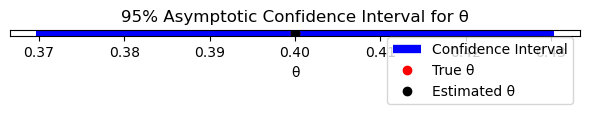

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Simulate Bernoulli samples
n = 1000
theta_true = 0.4
X = np.random.binomial(1, theta_true, n)

# Estimator and std error
theta_hat = np.mean(X)
stderr = np.sqrt(theta_hat * (1 - theta_hat) / n)

# Confidence level
alpha = 0.05
z = norm.ppf(1 - alpha/2)
ci_lower = theta_hat - z * stderr
ci_upper = theta_hat + z * stderr

print(f"Estimated θ: {theta_hat:.4f}")
print(f"95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Visualize
plt.figure(figsize=(6, 1))
plt.hlines(1, ci_lower, ci_upper, colors='blue', lw=6, label='Confidence Interval')
plt.plot(theta_true, 1, 'ro', label='True θ')
plt.plot(theta_hat, 1, 'ko', label='Estimated θ')
plt.title('95% Asymptotic Confidence Interval for θ')
plt.yticks([])
plt.xlabel('θ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Theory Recap
From the proof:
- $S_n = \sum X_i$ is Binomial($n, \theta$)
- $\hat{\theta} = \frac{S_n}{n}$ is unbiased
- $\sqrt{n}(\hat{\theta} - \theta) \xrightarrow{d} \mathcal{N}(0, \theta(1 - \theta))$

Then:
$$
P\left( \theta \in \left[\hat{\theta} \pm z_{1 - \alpha/2} \cdot \sqrt{\frac{\hat{\theta}(1 - \hat{\theta})}{n}} \right] \right) \approx 1 - \alpha
$$

### Distribution of $L_n$, i.e. the last non-zero $S_{2k}$ with $k \in \{0, 1, \dots, n\}$

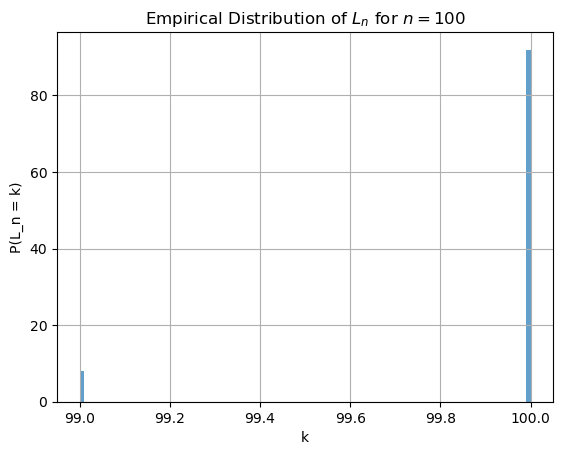

In [19]:
def simulate_Ln(n):
    S = 0
    L = 0
    for k in range(1, n + 1):
        X = np.random.choice([-1, 1])
        S += X
        if S != 0:
            L = k
    return L

samples = [simulate_Ln(100) for _ in range(10000)]
plt.hist(samples, bins=100, density=True, alpha=0.7)
plt.title("Empirical Distribution of $L_n$ for $n=100$")
plt.xlabel("k")
plt.ylabel("P(L_n = k)")
plt.grid(True)
plt.show()

#### Exact law of $L_n$

We use the formula:

$$
P(L_n = k) = \binom{n}{k} \theta^k (1 - \theta)^{n - k}
$$

where $\theta = \frac{1}{2}$. We compute this distribution.

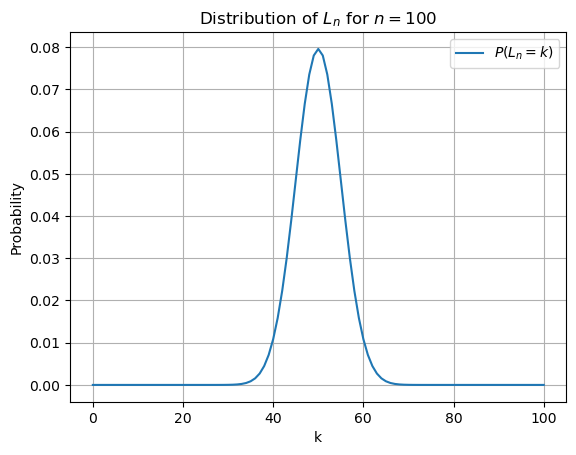

In [20]:
from scipy.special import comb
theta = 0.5
n = 100
probs = [comb(n, k) * theta**k * (1 - theta)**(n - k) for k in range(n + 1)]

plt.plot(probs, label=r"$P(L_n = k)$")
plt.title("Distribution of $L_n$ for $n=100$")
plt.xlabel("k")
plt.ylabel("Probability")
plt.grid(True)
plt.legend()
plt.show()


#### Events $ D_n^+ $, $ D_n^- $ and Their Probabilities

We define:

$$
D_n^+ = \{ S_k > 0 \text{ for all } k \in [1, n] \}
$$

$$
D_n^- = \{ S_k < 0 \text{ for all } k \in [1, n] \}
$$

$$
D_n = D_n^+ \cup D_n^-
$$

We simulate many symmetric walks to estimate their probabilities.

In [21]:
def simulate_walk(n):
    X = np.random.choice([-1, 1], size=n)
    S = np.cumsum(X)
    return S

N = 10000
n = 20
D_plus = D_minus = D = 0
for _ in range(N):
    S = simulate_walk(n)
    if np.all(S > 0):
        D_plus += 1
    if np.all(S < 0):
        D_minus += 1
    if np.all(S > 0) or np.all(S < 0):
        D += 1

D_plus/N, D_minus/N, D/N

(0.0908, 0.0821, 0.1729)

#### Recursive Definition of $ a_{n,r} $

We define a recurrence:

$$
a_{n,r} = \frac{1}{4} \left[ a_{n, r - 1} + a_{n - 1, r} + a_{n - 1, r - 1} \right]
$$

with the boundary condition:

$$
a_{n,r} = 0 \quad \text{if } r \not\in [0, n]
$$

In [22]:
def compute_a(n_max):
    a = np.zeros((n_max + 1, n_max + 1))
    a[0, 0] = 1  # initial value (can be 1 or another based on earlier context)
    for n in range(1, n_max + 1):
        for r in range(n_max + 1):
            a[n, r] = 0.25 * (a[n, r - 1] if r > 0 else 0
                            + a[n - 1, r]
                            + (a[n - 1, r - 1] if r > 0 else 0))
    return a

a_vals = compute_a(20)
a_vals[10, :15]  # show some values of a_{10,r}

array([9.53674316e-07, 2.38418579e-07, 5.96046448e-08, 1.49011612e-08,
       3.72529030e-09, 9.31322575e-10, 2.32830644e-10, 5.82076609e-11,
       1.45519152e-11, 3.63797881e-12, 9.09494702e-13, 2.27373675e-13,
       5.68434189e-14, 1.42108547e-14, 3.55271368e-15])

### Section 3: asymptotical behavior

##### Law of $p_n = \frac{2n}{4^n}$

We compute and plot this expression.

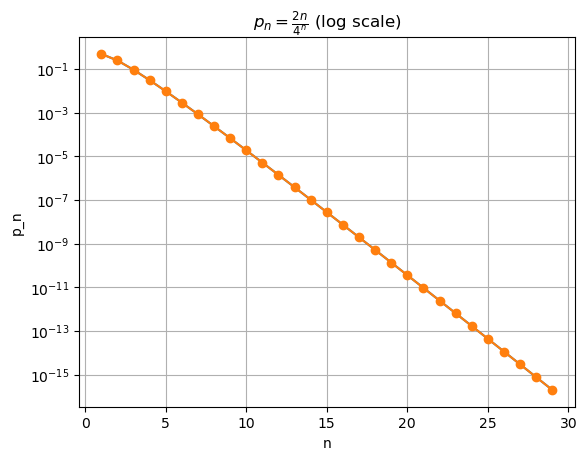

In [27]:
n_vals = np.arange(1, 30)
p_n = 2 * n_vals / (4 ** n_vals)
plt.plot(n_vals, p_n)
plt.semilogy(n_vals, p_n, marker='o')
plt.title(r"$p_n = \frac{2n}{4^n}$ (log scale)")
plt.xlabel("n")
plt.ylabel("p_n")
plt.grid(True)
plt.show()

#### Convergence in Distribution of $\frac{L_n}{n}$

We simulate 10,000 values of $ L_n $ for large $ n $, normalize them and plot the histogram.

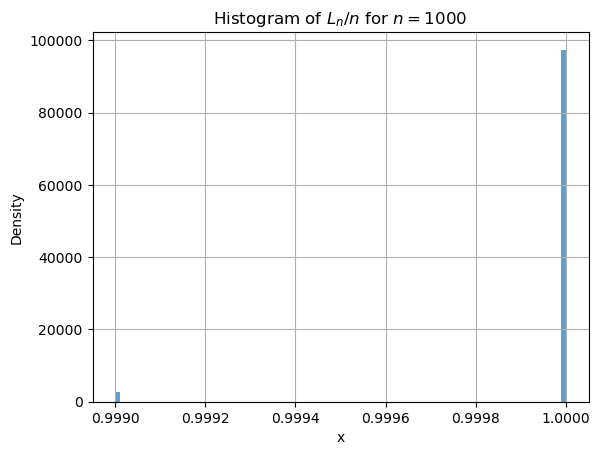

In [28]:
def simulate_Ln(n):
    S = 0
    L = 0
    for k in range(1, n + 1):
        X = np.random.choice([-1, 1])
        S += X
        if S != 0:
            L = k
    return L

n = 1000
samples = [simulate_Ln(n)/n for _ in range(10000)]
plt.hist(samples, bins=100, density=True, alpha=0.7)
plt.title(r"Histogram of $L_n/n$ for $n = 1000$")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.show()
